In [50]:
!pip install xarray

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import xarray as xr
import zarr
import seaborn as sns


In [52]:
print(Path.cwd())
dataset=xr.open_zarr('/Users/kevinha/Downloads/seasfirecube.zarr')

/Users/kevinha


/var/folders/fd/c30byq417d3dh1ystdk504100000gp/T/ipykernel_16091/1535083100.py:2: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  dataset=xr.open_zarr('/Users/kevinha/Downloads/seasfirecube.zarr')


In [53]:
dataset

<xarray.Dataset>
Dimensions:             (time: 966, latitude: 720, longitude: 1440)
Coordinates:
  * latitude            (latitude) float64 89.88 89.62 89.38 ... -89.62 -89.88
  * longitude           (longitude) float64 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                (time) datetime64[ns] 2001-01-01T12:00:00 ... 2021-12...
Data variables: (12/35)
    BAs_GWIS            (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    BurntArea           (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FCCI_BA             (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FCD_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FRP_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    LST_Day_CMG         (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ...                  ...
    t2mmax              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2mmin              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    tp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    vpd_cf              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    wp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ws10                (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>

In [54]:
def select_spatio_temporal_data(dataset, initial_timestep, timesteps, latitude, longitude):
    '''
    Desc
    ----
    Method to select a subset of the cube.
    
    Args
    ----
    dataset: xarray.Dataset
        * the dataset from which we want the selected variable
    initial_timestep: int
        * value in the interval [0,965], where value represents the position of the date we want in the time array
        * shows from what 8-day period we want to extract the data
    timesteps: int
        * value in the interval [1,966]
        * shows for how many consecutive 8-days periods we want to extract the data
    latitude: int
        * vallue in the interval [0,719] where value represents the position of the latitude we want in the latitude array
        * if we want all the latitudes, we set the value = -1
    longitude: int
        * vallue in the interval [0,1439] where value represents the position of the longitude we want in the longitude array
        * if we want all the longitudes, we set the value = -1    
    '''
    
    if(latitude == -1 and longitude == -1):
        return dataset.isel(time=slice(initial_timestep, initial_timestep+timesteps))
    
    return dataset.isel(time=slice(initial_timestep, initial_timestep+timesteps), latitude=latitude, longitude=longitude)

In [55]:
def select_variable_data(dataset, variable_name):
    '''
    Desc
    ----
    Method to select a particular variable (such as relaive humidity, windspeed, sst etc)
    from the DataCube.
    
    Args
    dataset: xarray.Dataset
        * the dataset from which we want the selected variable
    variable name: string
        * name of the selected variable
    '''
    
    return dataset[variable_name]

In [56]:
def earth_graph(dataset, variable_name, initial_timestep, timesteps, latitude=-1, longitude=-1, col_wrap=1):
    '''
    Desc
    ----
    Method to plot whole earth for specific variable for specific time interval.
    
    Args
    ----
    dataset: xarray.Dataset
        * the dataset from which we want the selected variable
    variable name: string
        * name of the selected variable
    initial_timestep: int
        * value in the interval [0,965], where value represents the position of the date we want in the time array
        * shows from what 8-day period we want to extract the data
    timesteps: int
        * value in the interval [1,966]
        * shows for how many consecutive 8-days periods we want to extract the data
    col_wrap: int
        *how many graphs will be plotted i the same row
    latitude: int
        * value = -1, that is whole earth
    longitude: int
        * value = -1, that is whole earth
    '''
    
    if (timesteps==1):

        select_spatio_temporal_data(select_variable_data(dataset, variable_name), 
                                    initial_timestep, 
                                    timesteps, 
                                    latitude, 
                                    longitude).plot()
    else:
        
        select_spatio_temporal_data(select_variable_data(dataset, variable_name), 
                                    initial_timestep, 
                                    timesteps, 
                                    latitude, 
                                    longitude).plot(x="longitude", 
                                                    y="latitude", 
                                                    col="time", 
                                                    col_wrap=col_wrap)

In [87]:
def prepOneTime(time):
    ba= select_spatio_temporal_data(select_variable_data(dataset, 'BurntArea'), time, 1, -1, -1)
    df= ba.to_dataframe()
    NDVI= select_spatio_temporal_data(select_variable_data(dataset, 'NDVI'), time, 1, -1, -1)
    DCM= select_spatio_temporal_data(select_variable_data(dataset, 'drought_code_max'), time, 1, -1, -1)
    land_surface_temp= select_spatio_temporal_data(select_variable_data(dataset, 'LST_Day_CMG'), time, 1, -1, -1)
    df2= NDVI.to_dataframe()
    df3= DCM.to_dataframe()
    df4= land_surface_temp.to_dataframe()    
    df['NDVI']= df2['NDVI']
    df['DCM']=df3['drought_code_max']
    df['LST']= df4['LST_Day_CMG']
    dfRet= df.dropna()
    return dfRet

In [88]:
df1=prepOneTime(3)

In [108]:
def plot(dframe):
    sns.violinplot(x=dframe["BurntArea"], width=500)
    sns.displot(dframe, x="NDVI")
    sns.displot(dframe, x="DCM")
    sns.displot(dframe, x="LST")
    

In [110]:
df1.head()

BurntArea      NDVI         DCM  \
time                latitude longitude                                    
2001-01-25 12:00:00 67.875   -163.625         0.0 -0.103904   16.015625   
                             -162.625         0.0 -0.132199    0.000000   
                             -162.125         0.0 -0.146429    0.000000   
                             -161.875         0.0 -0.122132    0.000000   
                             -141.125         0.0 -0.116627  204.564056   

                                                 LST  
time                latitude longitude                
2001-01-25 12:00:00 67.875   -163.625   12841.125000  
                             -162.625   12909.000000  
                             -162.125   12888.625000  
                             -161.875   12956.625000  
                             -141.125   12629.599609

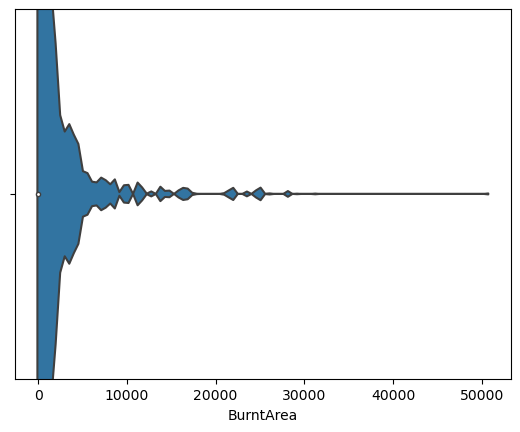

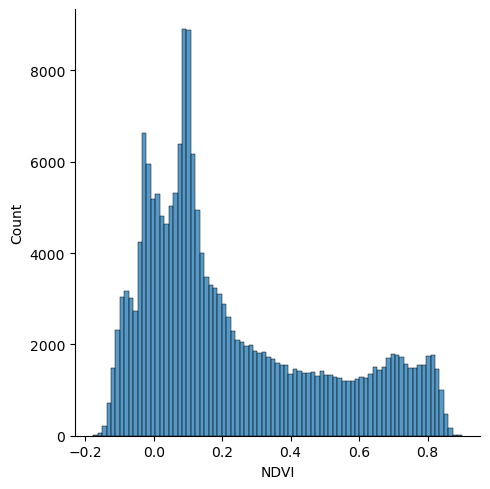

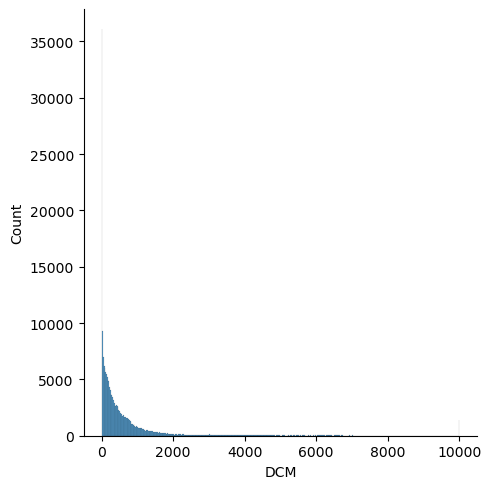

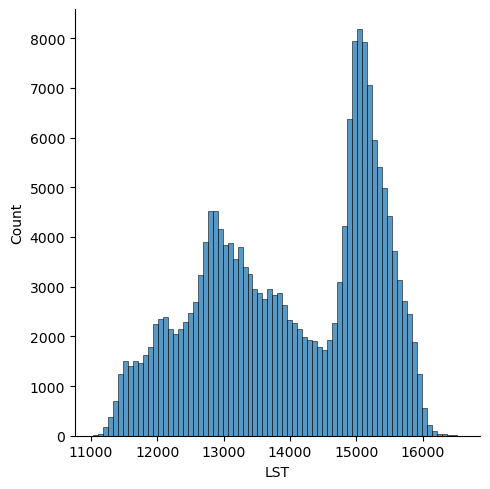

In [111]:
plot(df1)

In [127]:
actual_dataset=[df1]
for x in range(2,5):
    actual_dataset.append(prepOneTime(x))
    
    
    

In [128]:
type(actual_dataset[1])

pandas.core.frame.DataFrame

In [129]:
result = pd.concat(actual_dataset)

In [130]:
result

BurntArea      NDVI         DCM  \
time                latitude longitude                                    
2001-01-25 12:00:00  67.875  -163.625         0.0 -0.103904   16.015625   
                             -162.625         0.0 -0.132199    0.000000   
                             -162.125         0.0 -0.146429    0.000000   
                             -161.875         0.0 -0.122132    0.000000   
                             -141.125         0.0 -0.116627  204.564056   
...                                           ...       ...         ...   
2001-02-02 12:00:00 -55.125  -67.625          0.0  0.668555   30.666666   
                    -55.375  -69.375          0.0  0.568572    8.625651   
                             -68.625          0.0  0.595533   11.130859   
                             -67.375          0.0  0.713154   39.958984   
                    -55.625  -67.875          0.0  0.659242   21.442709   

                                                 LST  
time                latitude longitude                
2001-01-25 12:00:00  67.875  -163.625   12841.125000  
                             -162.625   12909.000000  
                             -162.125   12888.625000  
                             -161.875   12956.625000  
                             -141.125   12629.599609  
...                                              ...  
2001-02-02 12:00:00 -55.125  -67.625    13988.333008  
                    -55.375  -69.375    13931.000000  
                             -68.625    14181.000000  
                             -67.375    13745.000000  
                    -55.625  -67.875    13894.333008  

[767596 rows x 4 columns]